In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

mpg = sns.load_dataset('mpg')

In [2]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [4]:
# Task:
#     Create a visual showing the relationship between horsepower and fuel economy.
#     Create a table summarizing fuel economy by country of origin
#     Create a visual showing how fuel economy has changed over time
#     Create two other visuals or tables related to fuel economy.

# Visual showing the relationship between horsepower and fuel economy

<Axes: xlabel='horsepower', ylabel='mpg'>

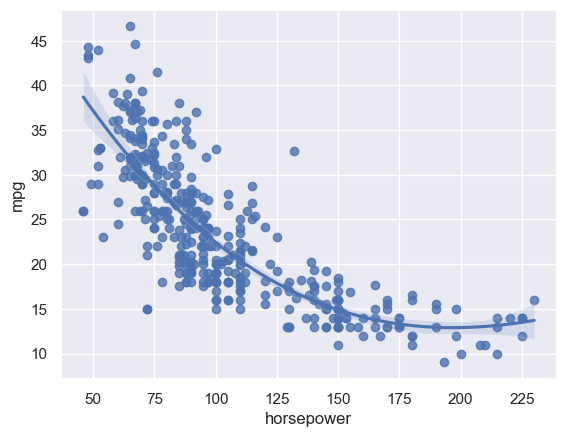

In [5]:
# Create regression plot showing the relationship between horsepowwer and mpg 

sns.regplot(data = mpg, x = 'horsepower', y = 'mpg', order = 3)

##### Using the regession plot you can see the general relationship between horsepower and mpg. As the horsepower of a vehicle increased the fuel economy (mpg) generally decreased.

# Table summarizing fuel economy by country of origin

In [6]:
# Average mpg for country origin 

avg_mpg_origin = mpg.groupby('origin')['mpg'].mean().sort_values(ascending=False)
avg_mpg_origin

origin
japan     30.450633
europe    27.891429
usa       20.083534
Name: mpg, dtype: float64

In [7]:
# Turns Average mpg for country origin from series into dataframe 

avg_mpg_origin = avg_mpg_origin.to_frame().reset_index()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


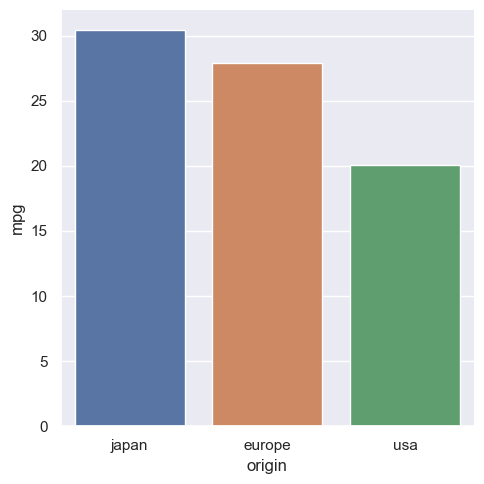

In [8]:
# Create bar plot showing average mpg per country origin for model year (70-82)

sns.catplot(data = avg_mpg_origin, x = 'origin', y = 'mpg', kind = 'bar')

##### From 1970 to 1982 Japan has had the highest average mpg : 30.45 
##### Europe in second place with mpg : 27.89
##### USA in last place with mpg: 20.08

# Visual showing how fuel economy has changed over time

In [9]:
# Create average mpg for model year to series 

model_year_mpg = mpg.groupby('model_year')['mpg'].mean()
model_year_mpg

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [10]:
# Turns Average mpg for model year from series into dataframe

model_year_mpg = model_year_mpg.to_frame().reset_index()
model_year_mpg

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704
5,75,20.266667
6,76,21.573529
7,77,23.375000
8,78,24.061111
9,79,25.093103


In [11]:
# Calculate the percent change in mpg year over year 

model_year_mpg['mpg_percent_change'] = model_year_mpg['mpg'].pct_change()
model_year_mpg

,model_year,mpg,mpg_percent_change
0,70,17.689655,NaN
1,71,21.250000,0.201267
2,72,18.714286,-0.119328
3,73,17.100000,-0.086260
4,74,22.703704,0.327702
5,75,20.266667,-0.107341
6,76,21.573529,0.064483
7,77,23.375000,0.083504
8,78,24.061111,0.029352
9,79,25.093103,0.042890


<Axes: xlabel='model_year', ylabel='mpg'>

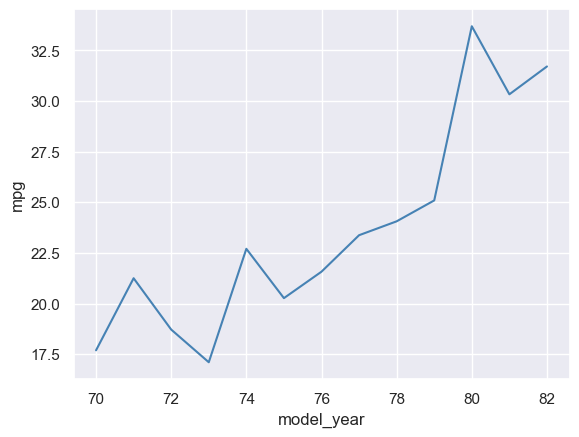

In [12]:
# Create line plot for average mpg for model years across all countries of origin

sns.lineplot(data = model_year_mpg, x = 'model_year', y = 'mpg', color = 'steelblue') 

##### The average mpg including all origins in the data set has increased for model years 1970 to 1982. It is observed that the sharpest increases occured for model year 73 to 74 and 79 to 80. 
##### In 73 to 74 average mpg increased by 32.77%  
##### In 79 to 80 average mpg increased by 34.28%

In [13]:
# Average mpg grouped by model_year and country origin

model_year_mpg = mpg.groupby(['model_year','origin'])['mpg'].mean()
model_year_mpg.head(12)

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
72          europe    22.000000
            japan     24.200000
            usa       16.277778
73          europe    24.000000
            japan     20.000000
            usa       15.034483
Name: mpg, dtype: float64

In [14]:
# Turns Average mpg for country origin and model_year from series into a dataframe

model_year_mpg = model_year_mpg.to_frame().reset_index()
model_year_mpg.head(12)

,model_year,origin,mpg
0,70,europe,25.200000
1,70,japan,25.500000
2,70,usa,15.272727
3,71,europe,28.750000
4,71,japan,29.500000
5,71,usa,18.100000
6,72,europe,22.000000
7,72,japan,24.200000
8,72,usa,16.277778
9,73,europe,24.000000


<Axes: xlabel='model_year', ylabel='mpg'>

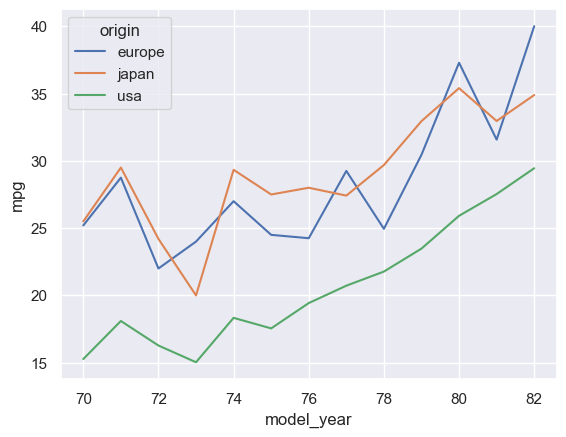

In [15]:
# Create a line plot for average mpg for model year (70-82) in Europe, Usa, and Japan

sns.lineplot(data = model_year_mpg, x = 'model_year', y = 'mpg', hue = 'origin') 

##### USA has always tailed Europe and Japan in overall fuel economy (mpg)
##### Over time Europe and Japan have alternated having the best average mpg by model year

## Weight vs Mpg

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


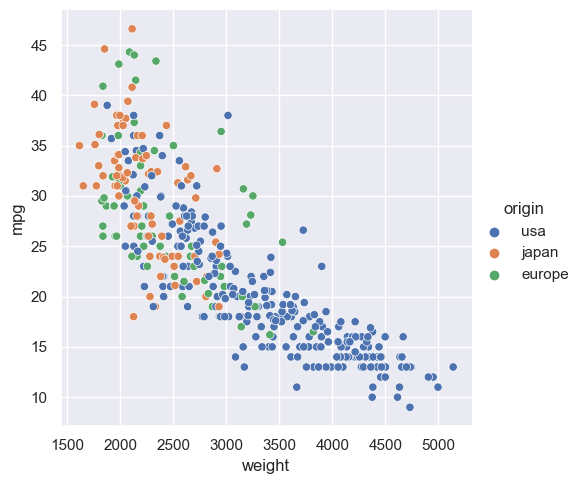

In [16]:
# Create scatter plot showing the relationship bwtween weight and mpg by country of origin

sns.relplot(data = mpg, x = 'weight', y = 'mpg' , hue = 'origin')

##### The scatter plot shows the correlation that the heavier the vehicle the lower the fuel economy (mpg). 
##### USA accounts for the majority of vehicle's weighting 3500 pounds or more in the data set

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


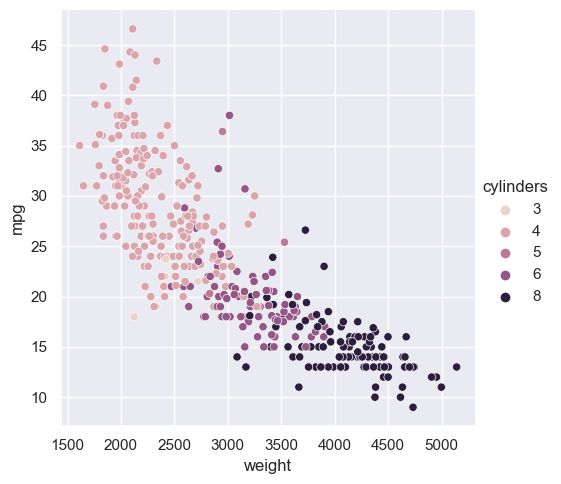

In [17]:
# Create scatter plot showing the relationship bwtween weight and mpg by number of cylinders

sns.relplot(data = mpg, x = 'weight', y = 'mpg' , hue = 'cylinders')

##### In this scatter plot demonstrates the vehicle's with higher cylinder counts generally have a lower mpg, compared to vehicle's with low cylinder counts that have a higher mpg. Also the vehicle's weighting over 3500 pounds have between 6 to 8 cylinders and vehicle's weighing less than 3500 pounds have between 3 to 5 cylinders. 